In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

df = pd.Dataframe(iris.data,columns=iris.feature_names)
df.head()

In [5]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['flowername'] = df.target.apply(lambda x: iris.target_names[x] )
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowername
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

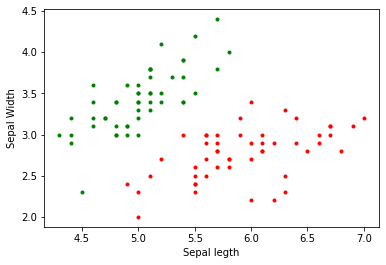

In [23]:
plt.xlabel('Sepal legth')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green" ,marker='.')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="red" ,marker='.')

In [24]:
# Train test split


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
x= df.drop(['target','flowername'],axis='columns')
y= df.target


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2,random_state=1)

In [31]:
len(x_train)


120

In [32]:
len(x_test)

30

In [35]:
from sklearn.neighbors import KNeighborsClassifier


In [37]:
knn = KNeighborsClassifier(n_neighbors=10)

In [38]:
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=10)

In [39]:
knn.score(x_test,y_test)


1.0

In [40]:
knn.predict([[4.8,3.0,1.5,0.3]])


array([0])

In [41]:
#plot confusion Matrix


In [43]:
from sklearn.metrics import confusion_matrix
y_pred= knn.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

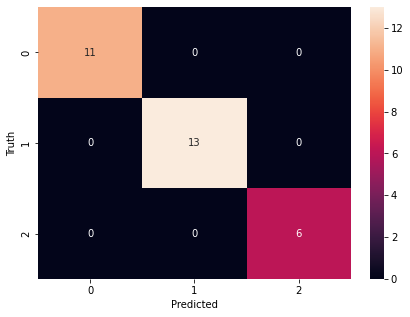

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

